In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from Algorithms import AMP

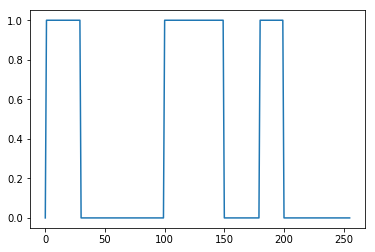

In [3]:
## Generate Signal
x_0=np.zeros((256,1))
x_0[1:30]=1
x_0[100:150]=1
x_0[180:200]=1
plt.plot(x_0)

In [8]:
## Parameters
n=len(x_0)
m=round(n / 3)
iters=30

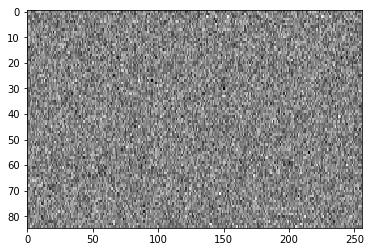

In [15]:
## Generate Gaussian Measurement Matrix
phi=np.random.randn(m,n)
for j in range(0,n):
    phi[:,j]=phi[:,j] / np.sqrt(sum(abs(phi[:,j]) ** 2))
plt.imshow(phi, cmap=plt.get_cmap('gray'), aspect='auto', interpolation='none')